In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [8]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        # 입력채널 1 = 흑백이미지
        # 출력채널 16 = 설계자의 임의 결정, 출력이 많아지면 오버피팅 문제가 생길 수 있음
        # 커널 사이즈 3 = 보편적인 크기
        # 스트라이드 1 = pooling 할거기 때문에 기본적으로 설정
        # 패딩 1 = pooling 유지를 위해 기본적으로 설정
        
        self.relu1 = nn.ReLU()
        
        self.pool1 = nn.MaxPool2d(2)
        # 커널 사이즈 2 = 보편적인 사이즈 2*2
        
        self.conv2 = nn.Conv2d(16,32,kernel_size=3, stride=1, padding=1)
        # 입력채널 16 -> 상기 합성층의 출력 채널 수
        # 출력 채널 32 -> 설계자의 임의 결정
        
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        
        self.fc = nn.Linear(32 * 7 * 7, 10)
        # 32 -> 상기 합성층의 출력 채널 수
        # 7 * 7 -> 상기 풀링을 거친 특징값 행렬의 크기
        
    def forward(self,x) :
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(x.size(0), -1)   # view를 통해서 1차원으로 펴는 작업
        
        x = self.fc(x)
        return x

TypeError: 'list' object cannot be interpreted as an integer

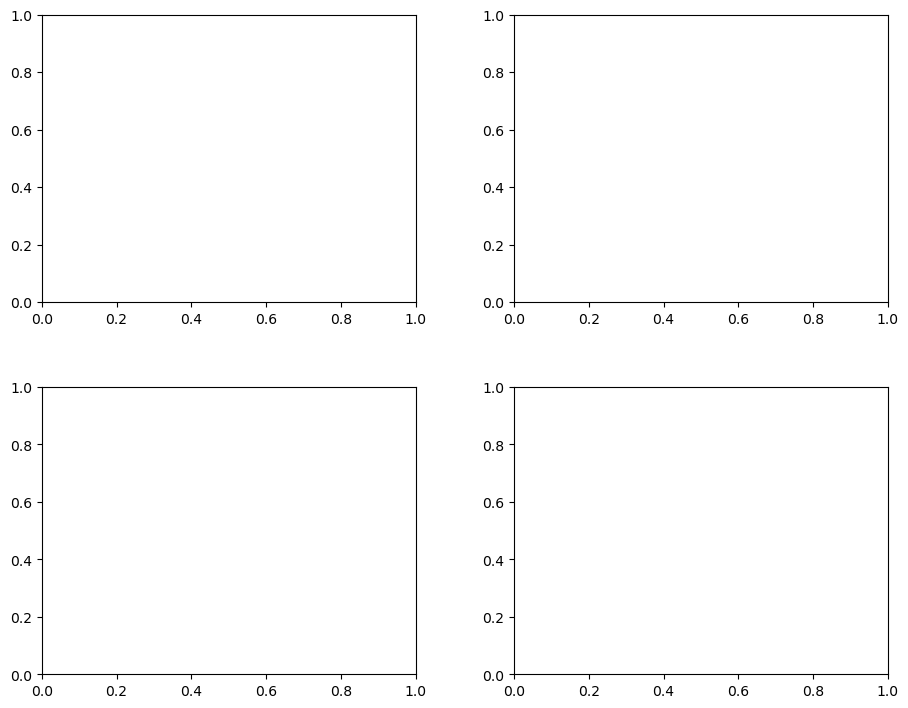

In [9]:
if __name__ =='__main__':
    train_dataset = MNIST('./train', train=True, transform=transforms.ToTensor(), download=True)
    test_dataset = MNIST('./train', train=False, transform=transforms.ToTensor(), download=False)
    # train_dataset이 만들어지면서 download=True 옵션 때문에 지정한 ./train 경로에 다운로드 됨
    # test_dataset은 상기 경로에 다운로드된 데이터 중 t10k로 시작하는 데이터를 train=False 옵션으로 사용하게 됨
    # transform은 현재 tensor화 이외에는 적용되지 않음
    
    batch_size = 64
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    # train dataloader는 shuffle 옵션을 True로 지정
    # test dataloader는 shuffle 옵션이 필요없음
    
    model = CNN().to(device)
    # 모델을 적절한 장치에 넘김
    
    criterion = nn.CrossEntropyLoss()
    # 다중 클래스 분륜 문제이므로, Cross Entropy 손실 함수 사용
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    # lr 초기값은 설계자의 임의 설정
    
    num_epochs = 10
    
    fig, axs = plt.subplots(2,2,figsize=(10,8))
    fig.tight_layout(pad=4.0)
    axs = axs.flatten()
    
    num_epochs = []
    
    
    
    for epoch in range(num_epochs):
        model.train()
        # 모델을 학습 모드로 설정
        running_loss = 0.0
        # 트레인 로더를 한 번 순회한 오차값
        
        for images, labels in train_loader :
            model.train()
            # 모델을 학습 모드로 설정
            running_loss = 0.0
            # 트레인 로더를 한번 순회한 오차값
            
            for images, labels in train_loader:
                images = images.to(device)
                images = labels. to(device)
                # loader에서 받아온 image와 label을 적절한 장치에 넘김
                
                optimizer.zero_grad()   # grad 초기화
                
                outputs = model(images)
                # 모델에 받아온 images를 입력 후 예측값은 outputs를 받아옴
                
                loss = criterion(outputs, labels)
                # 실제 정답인 labels와 상기 예측값은 outputs를 손실함수로 대조하여 오차 출력
                
                loss.backward()
                optimizer.step()
                # 역전파 이후 optimizer가 가중치 업데이트
                
                running_loss += loss.item() * images.size(0)
                
            epoch_loss = running_loss / len (train_dataset)
            epoch_losses.append(epoch_loss)
            # epcoch 순회마다 발생한 loss를 리스트에 추가
            
            print(f'Epoch{epoch+1}/ {num_epochs}, Loss : {epoch_loss:.4f}')
            # Epoch 순회마다 발생한 loss 출력
            
            if epoch == 0:
                # 첫 번째 합성곱 레이어의 가중치 시각화
                weights = model.conv1.weight.detach().cpu().numpy()
                axs[0].imshow(weights[0,0], cmap='coolwarm')
                axs[0].set_title('Conv1 Weights')
                divider = make_axes_locatable(axs[0])
                cax = divider.append_axs('right', size='5%', pad=0.05)
                plt.colorbar(axs[0].imshow(weights[0,0],cmap='coolwarm'),cax=cax)
                weights = model.conv1.weight.detach().cpu().numpy()
                
                
                # 두 번째 합성곱 레이어의 가중치 시각화
                weights = model.conv2.weight.detach().cpu().numpy()
                axs[1].imshow(weights[0,0], cmap='coolwarm')
                axs[1].set_title('Conv2 Weights')
                divider = make_axes_locatable(axs[1])
                cax = divider.append_axs('right', size='5%', pad=0.05)
                plt.colorbar(axs[1].imshow(weights[0,0],cmap='coolwarm'),cax=cax)
            
            # Epoch Loss 그래프
            axs[3].plot(range(epoch+1), epoch_losses)
            axs[3].set_title('traing_loss')
            axs[3].xlabel('Epoch')
            axs[3].ylabel('Loss')
            
        plt.show()
            
        # 이하 모델 평가 코드
        model.eval()
        correct = 0
        total = 0
        
        
        with torch.no_grad():   # 무조건 순전파만, 가중치 업데이트를 하지 않음
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                
                outputs = model(images)
                # outputs가 10개의 확률함수로 나타나게 될 것
                # -> outputs에 나타난 10개 확률 중 가장 높은 값을 취함 -> 모델이 예측한 숫자
                temp, predidcted = torch.max(outputs.data, 1)
                print(f'temp is following value : {temp}')
                
                total += labels.size(0)
                # 이번 testloader에 올라온 label 숫자를 총 숫자에 합산함
                correct += (predidcted == labels).sum().item()
                # predicted와 labels 둘 다 일정 갯수의 행렬 형태로 나올 것
                # (predicted == labels) -> 같은 값은 행렬 내에서 1, 아니면 0 -> ex) [1., 0., 1., 1., ...]
                # 위에서 얻은 1,0으로 이루어진 행렬의 합을 구함 -> sum()
                
    accuacy = (correct/total)*100
    print(f'Test Accuracy : {accuacy:.2f} %')